In [1]:
# bringing in modules, os for path routing, pandas to read and export csv and matplotlib to create plots
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# storing 2 variables, reading csv with pandas
annualGoldChina = ('..\Resources/output_Annual_Gold_Value_In_Yen.csv')
inflationRates = ('..\Resources/inflation_rates_2013-2021.csv')

goldDf = pd.read_csv(annualGoldChina)
inflationDf = pd.read_csv(inflationRates)

In [3]:
# filtering columns by country and calling only rows starting with 'China'
china_inflation = inflationDf[inflationDf['country'] == 'China']

In [4]:
def calculate_percent_change(data, year_column, value_column):
    percent_change = {}
    percent_change[data[year_column].iloc[0]] = 0
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        print(f"old_value: {old_value}, new_value: {new_value}")
        change = ((new_value - old_value) / old_value) * 100
        percent_change[data[year_column].iloc[i]] = change
    return percent_change

def china_inflation_creation(data):
    china_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        china_inflation_made[year] = inflation_rate
    return china_inflation_made

In [5]:
# Assigning 2 variables, holding china_inflation and goldDf with the calculated column
chinaInflationChange = china_inflation_creation(china_inflation)
percentChangeGold = calculate_percent_change(goldDf, 'Year', 'Gold_Value_In_Yen')

old_value: 8657.244534892092, new_value: 7788.123522698397
old_value: 7788.123522698397, new_value: 7272.31082972419
old_value: 7272.31082972419, new_value: 8298.684525330902
old_value: 8298.684525330902, new_value: 8516.17756430248
old_value: 8516.17756430248, new_value: 8399.43315028541
old_value: 8399.43315028541, new_value: 9651.487813404725
old_value: 9651.487813404725, new_value: 12267.04212386872
old_value: 12267.04212386872, new_value: 11608.424387617615
old_value: 11608.424387617615, new_value: 12119.964804053496


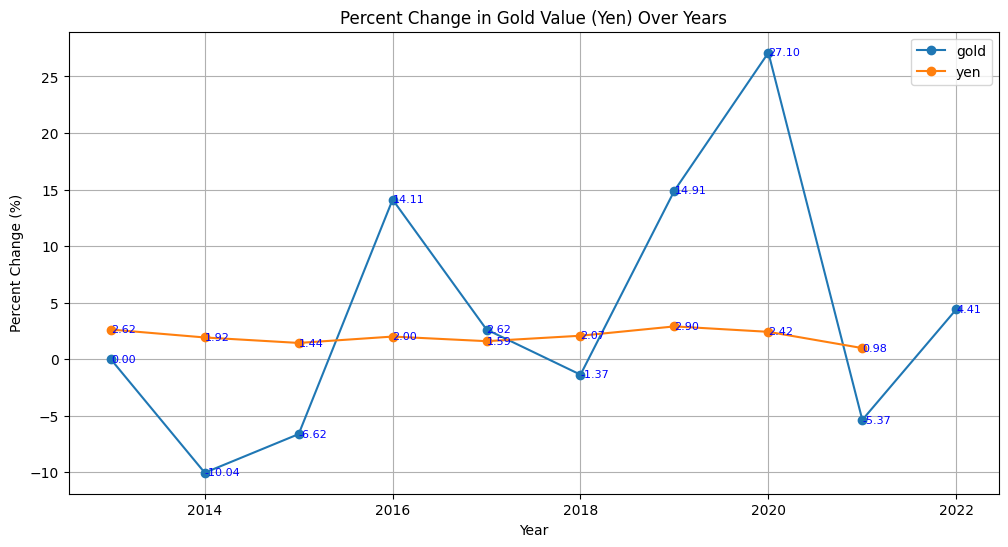

In [6]:
# plotting percent change in gold value from 2013->2022
plt.figure(figsize=(12, 6))
plt.plot(percentChangeGold.keys(), percentChangeGold.values(), marker='o', linestyle='-', label='gold')
plt.plot(chinaInflationChange.keys(), chinaInflationChange.values(), marker='o', linestyle='-', label='yen')

for year, rate in percentChangeGold.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
for year, rate in chinaInflationChange.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
    
plt.title('Percent Change in Gold Value (Yen) Over Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('..\Plotted Charts', 'ChinaYenPercentages.png'))
plt.show()